In [36]:
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
def addToFile(file, what):
    f = open(file, 'a').write(what) 

## Finding reactions which are already classified

To quantitatively analyse the quality of the clustering by the LSH Forest algorithm we can query reactions which have a known reaction class and check the nearest neighbours returned. The near neighbours should also have the same reaction class if the classification works well.

In [3]:
# Define current working directory so we can navigate folders easily
cwd = os.getcwd()
print(cwd)
os.chdir('../')
pwd = os.getcwd()
print(pwd)

/home/gah/oprd/jupyter
/home/gah/oprd


In [4]:
# Start by importing the data from Adding_reagent_SMILES.ipynb
data = pd.read_csv(pwd+'/data/reagents_added.csv')

# Define logfile path
# Set logfile filepath
logfile = pwd+'/logs/classification.txt'

In [5]:
# Find out how many reactions are classified already

# Get the all the reaction classes listed in the dataset
unique_reaction_types = set(data['Reaction Type'].to_list())

# Remove 'None' so we can access reactions with a class
unique_reaction_types.remove('None')

# Find all the reactions which have a classification
with_reaction_type = data[data['Reaction Type'].isin(unique_reaction_types)]

In [10]:
# Logfile entry # of unique reaction types
addToFile(logfile, ('Number of unique reaction types listed: {}\n'
                    .format(len(unique_reaction_types))))

In [11]:
# Logfile entry # of classified reactions
addToFile(logfile, ('Number of reactions with a reaction type: {}\n'
                    .format(len(with_reaction_type))))

In [6]:
# Check how many reactions have a reaction type
print(len(with_reaction_type))

628


In [7]:
# Some reactions have duplicate reaction types, replace with single entry to make count accurate
with_colon = set(with_reaction_type[with_reaction_type["Reaction Type"].str.contains(";", regex=False)]["Reaction Type"].to_list())
new_names = [i.split('; ')[0] for i in with_colon]
processed_with_reaction_type = with_reaction_type.replace(with_colon, new_names)

In [8]:
# Save the reactions with a reaction type to a csv file
processed_with_reaction_type.to_csv(pwd+'/data/reactions_with_reaction_type.csv', index=False)

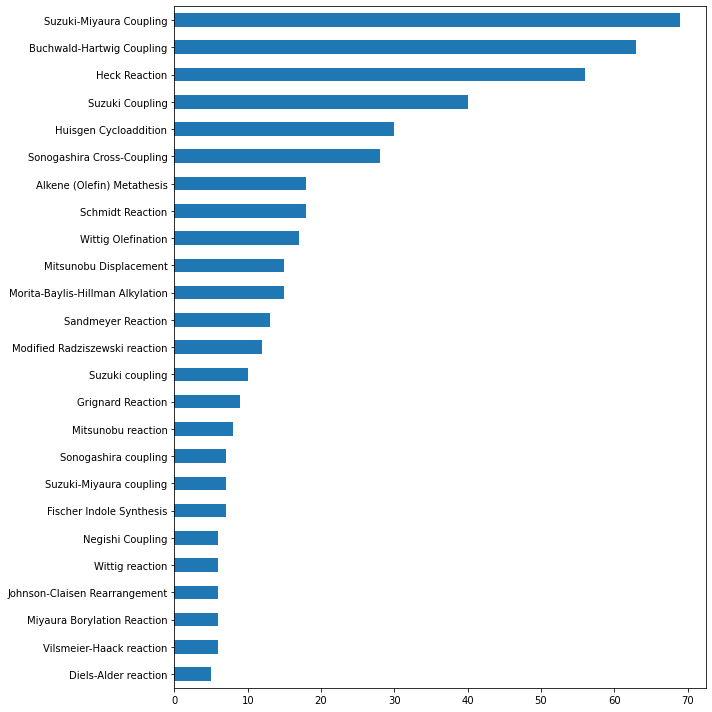

In [32]:
processed_with_reaction_type["Reaction Type"].value_counts().sort_values()[-25:].plot(kind = 'barh', figsize=(10,10))
plt.tight_layout()
plt.savefig(pwd+"/plots/reaction_class_plot.png", dpi=300)

## Sample of 10 reaction types to use as query to LSH forest

The SMILES for these reactions will be used to generate a DRFP fingerprint in Compute DRFPs.ipynb

In [13]:
# Build a list of reaction types to search
reaction_types_list = ["Suzuki-Miyaura Coupling",
                       "Huisgen Cycloaddition",
                       "Buchwald-Hartwig Coupling",
                       "Heck Reaction",
                       "Grignard Reaction"]

In [42]:
# Select one random reaction from each reaction type
stored_reactions = []

for i in reaction_types_list:
    
    sample = processed_with_reaction_type[
                processed_with_reaction_type['Reaction Type']
                                         == i].sample(n=1)["Reactants.Reagents>>Products"].to_list()[0]
    stored_reactions.append(sample)

In [44]:
# Save it as a pickle file
with open(pwd+"/data/query_reactions.pkl", "wb+") as f:
        pickle.dump((stored_reactions, reaction_types_list), f, protocol=4)